<a href="https://colab.research.google.com/github/dbremont/models/blob/main/models/Boston_Housing_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install xlrd

In [1]:
from google.colab import files

In [7]:
uploaded = files.upload()

Saving housing.csv to housing.csv


In [27]:
import pandas as pd
import numpy as np

In [10]:


column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Replace 'your_file.xlsx' with the path to your Excel file
df = pd.read_csv('/content/housing.csv', header=None, delimiter=r"\s+", names=column_names)  # Use engine='openpyxl' for .xlsx files

<Axes: >

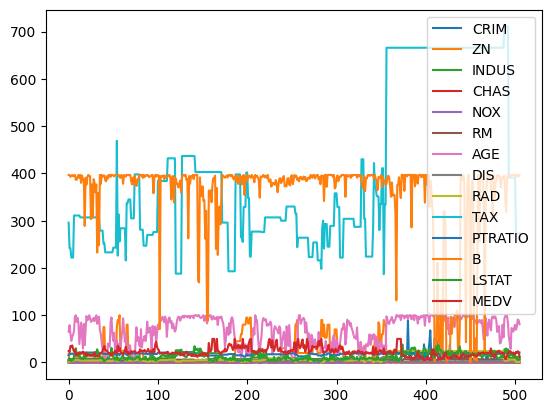

In [25]:
# Display the DataFrame
# dir(df)
df.plot()

In [29]:
x = np.arange(15, dtype=np.int64).reshape(3, 5)

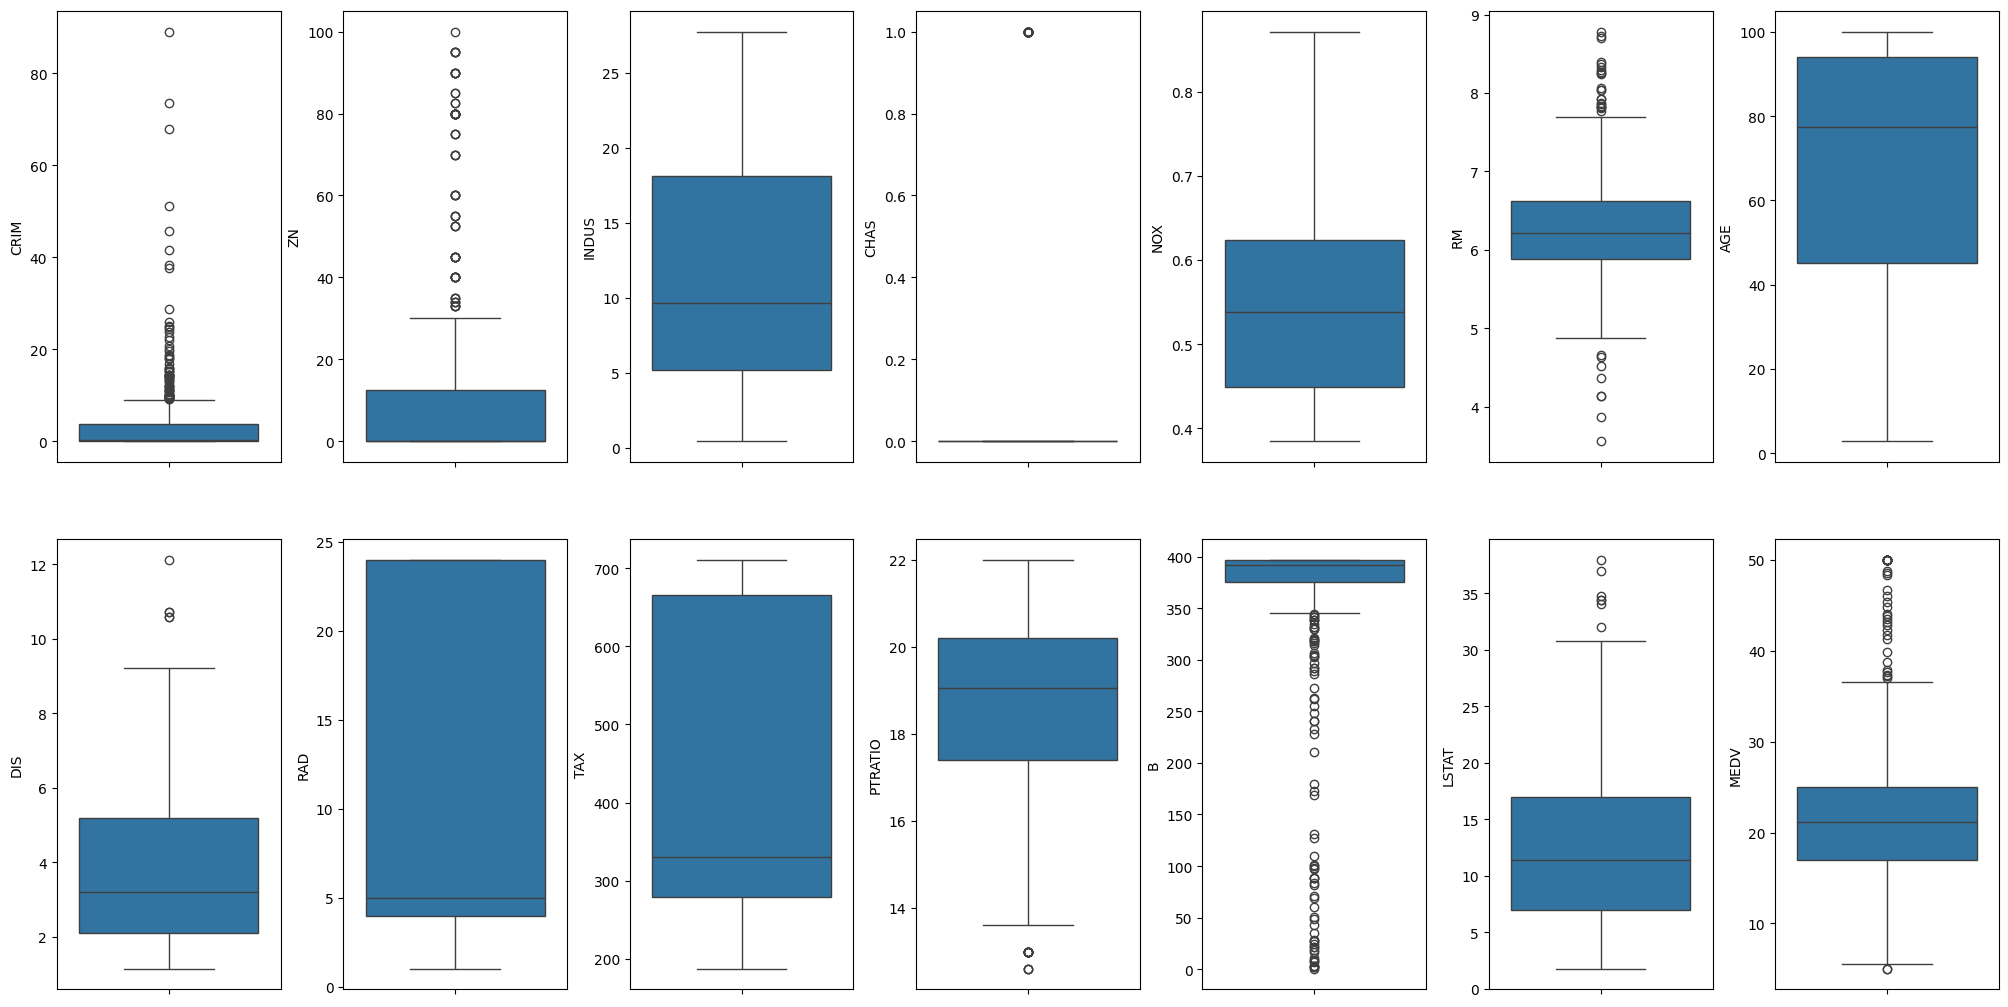

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

data = df

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


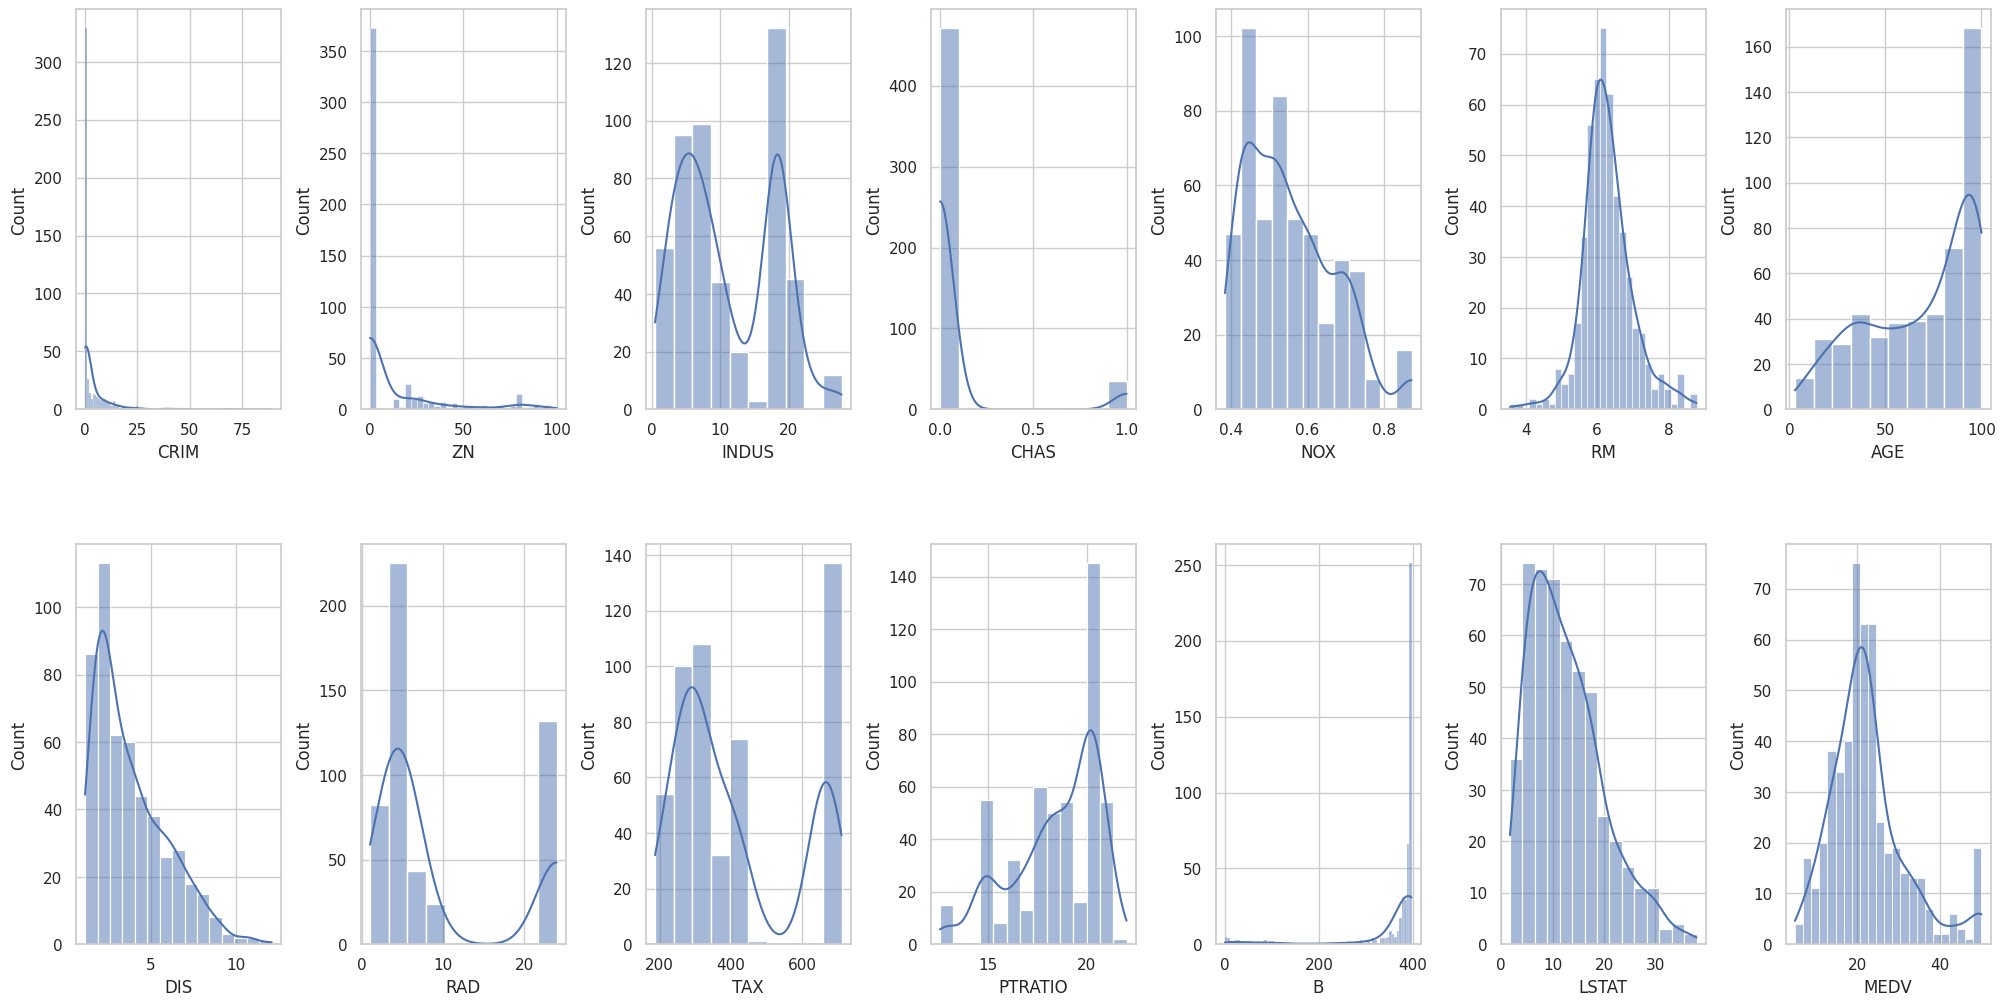

In [38]:
# Set the aesthetic style of the plots
sns.set_theme(style="whitegrid")

# Create the subplots
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
axs = axs.flatten()

# Loop through the dataset and create plots
for index, (k, v) in enumerate(data.items()):
    sns.histplot(v, kde=True, ax=axs[index])  # kde=True adds a Kernel Density Estimate plot

# Adjust the layout
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


<Axes: >

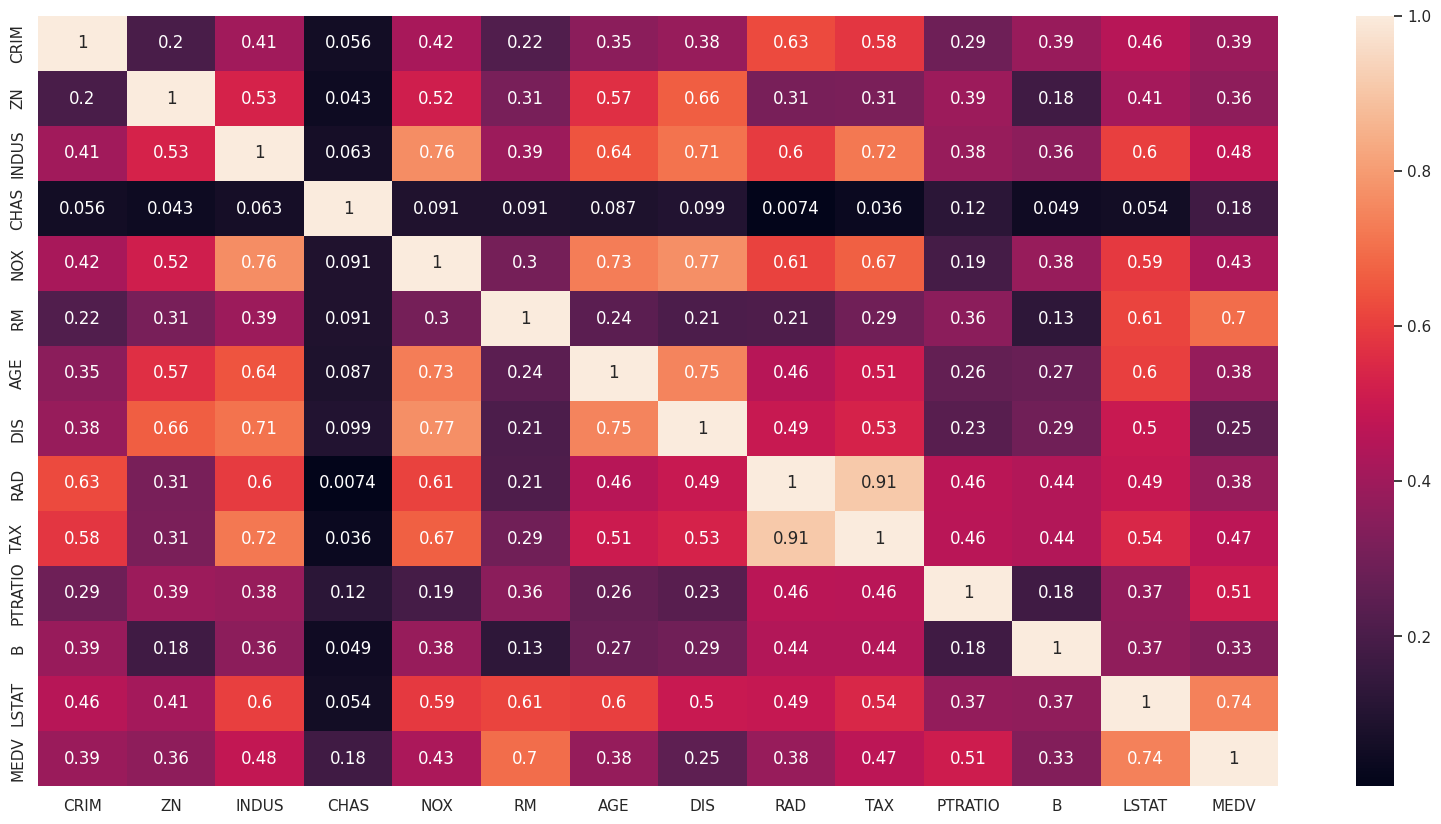

In [39]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)

From correlation matrix, we see TAX and RAD are highly correlated features. The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5 with MEDV which is a good indication of using as predictors. Let's plot these columns against MEDV.

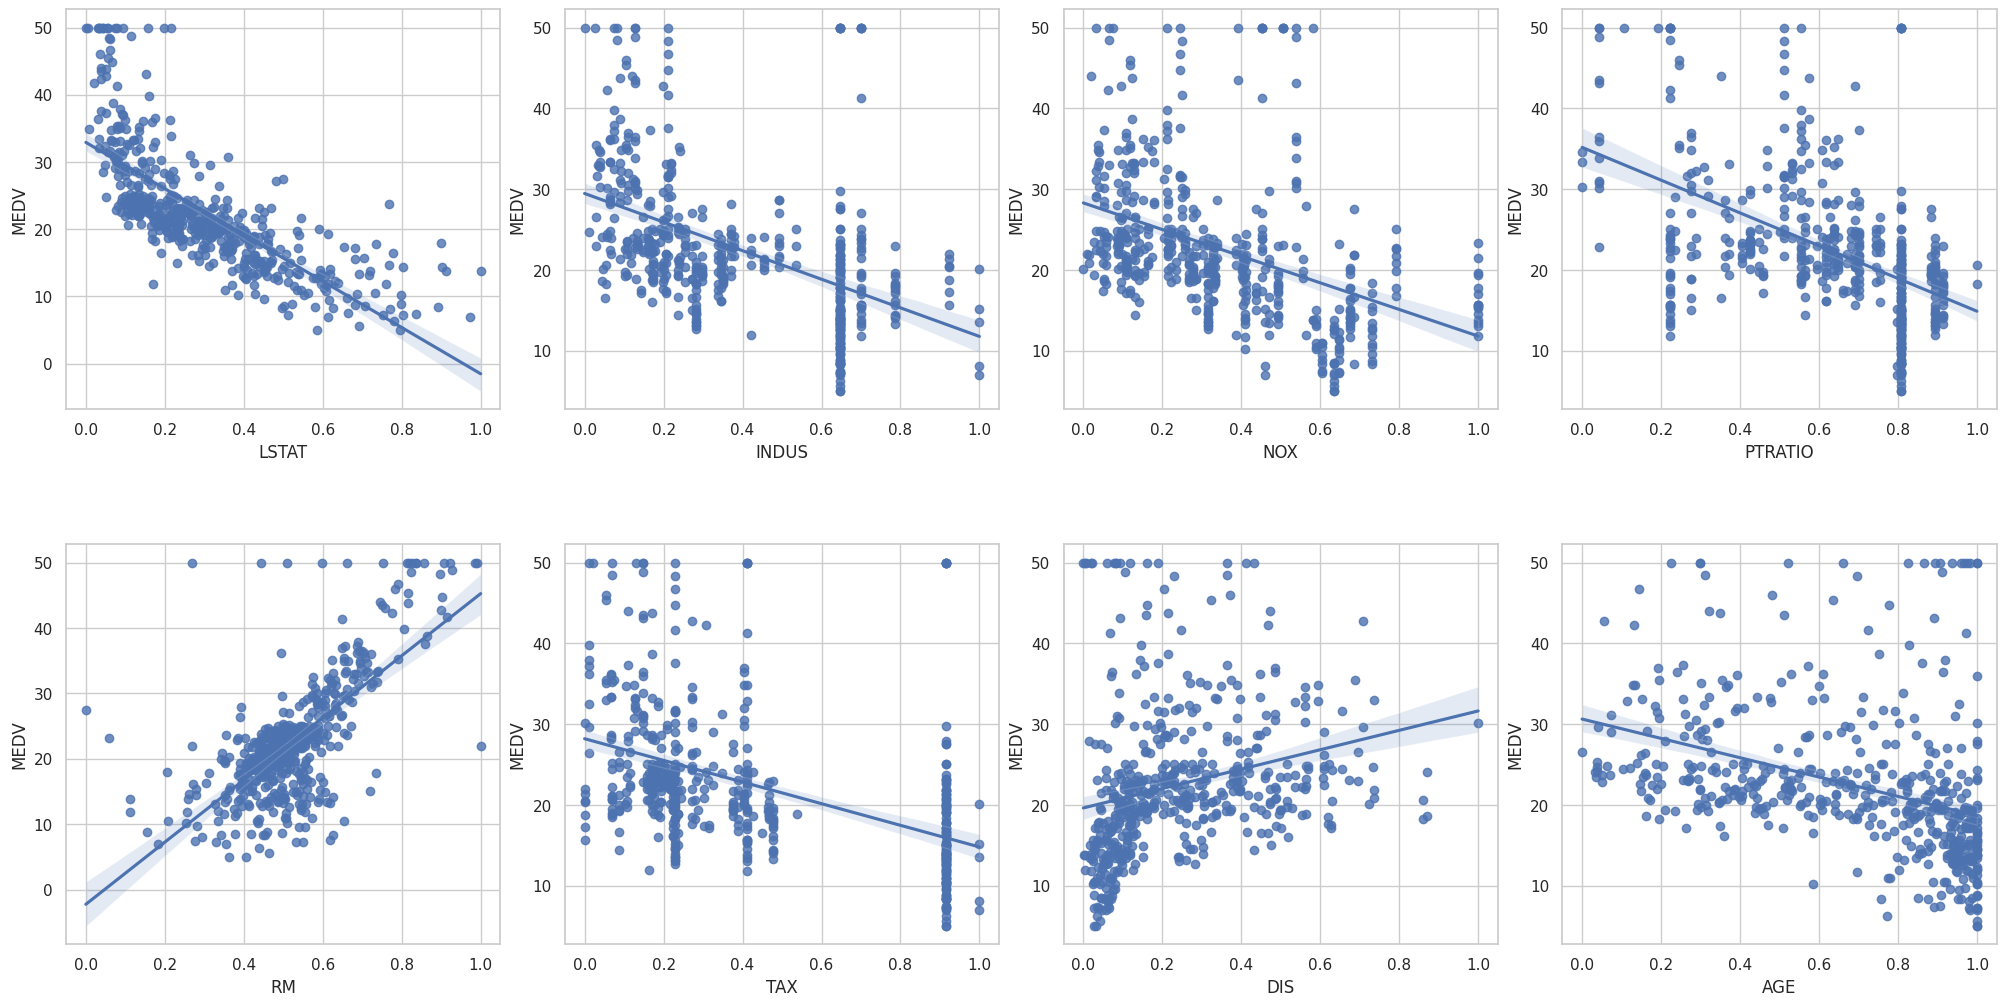

In [42]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = data.loc[:,column_sels]
y = data['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


So with these analsis, we may try predict MEDV with 'LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE' features. Let's try to remove the skewness of the data trough log transformation.

In [43]:
y =  np.log1p(y)

for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

Let's try Linear, Ridge Regression on dataset first.

In [55]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold
import numpy as np

# l_regression = linear_model.LinearRegression()
# kf = KFold(n_splits=10)
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# scores = cross_val_score(l_regression, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

        LSTAT     INDUS       NOX   PTRATIO        RM       TAX       DIS  \
173  0.183746  0.131598  0.228888  0.354545  0.436343  0.188979  0.129203   
274  0.048475  0.218109  0.120067  0.426519  0.477829  0.120324  0.237500   
491  0.372172  1.000000  0.379056  0.586604  0.381223  0.693147  0.064996   
72   0.099466  0.379399  0.056015  0.531879  0.391897  0.203097  0.320691   
452  0.356840  0.646628  0.515752  0.592504  0.421495  0.649259  0.106728   
..        ...       ...       ...       ...       ...       ...       ...   
412  0.642202  0.646628  0.362010  0.592504  0.186019  0.649259  0.037858   
436  0.371792  0.646628  0.548383  0.592504  0.441901  0.649259  0.076392   
411  0.430355  0.646628  0.362010  0.592504  0.465755  0.649259  0.035544   
86   0.267826  0.147727  0.123710  0.487143  0.385402  0.108409  0.262261   
75   0.181447  0.453446  0.101650  0.500130  0.420111  0.338379  0.267522   

          AGE  
173  0.607726  
274  0.269233  
491  0.686949  
72   0.0492

## References

- [The Boston Housing Dataset](https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset)